**Health Risk Calculation**

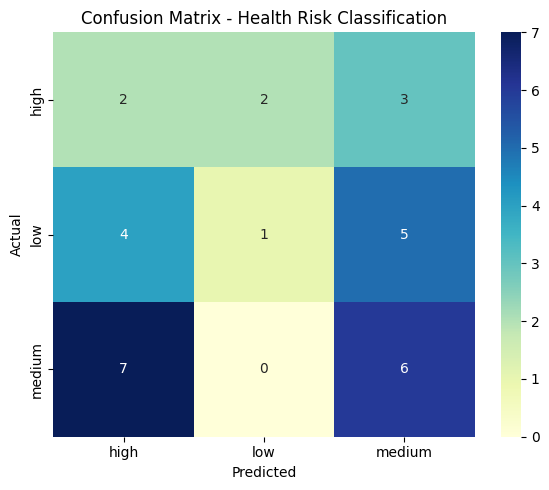

Classification Report:

              precision    recall  f1-score   support

        high       0.15      0.29      0.20         7
         low       0.33      0.10      0.15        10
      medium       0.43      0.46      0.44        13

    accuracy                           0.30        30
   macro avg       0.31      0.28      0.27        30
weighted avg       0.33      0.30      0.29        30



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


file_name ="/content/health_risk.csv"
df = pd.read_csv(file_name)

df.head()

le = LabelEncoder()
df['risk_encoded'] = le.fit_transform(df['risk_level'])

X = df[['bmi', 'exercise_hours', 'junk_food_freq']]
y = df['risk_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Health Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))
